Le nombre optimal de voisins est 3.
Accuracy: 0.9649


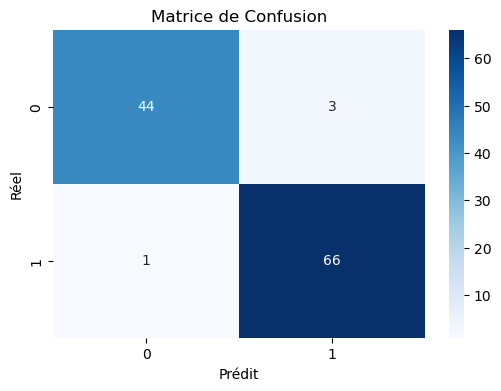

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Charger le dataset
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
X = df.values  # Toutes les colonnes comme features
y = cancer_data.target

# 2. Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Normalisation des données
scaler = Normalizer().fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# 4. Standardisation des données
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

# 5. Recherche du meilleur k avec validation croisée
k_list = list(range(1, 50, 2))  # Liste des valeurs de k à tester
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k, metric='manhattan'), X_train_standardized, y_train, cv=10, scoring='accuracy').mean() for k in k_list]

# Calcul de l'erreur quadratique moyenne (MSE)
MSE = [1 - score for score in cv_scores]

# Détermination du meilleur k
best_k = k_list[MSE.index(min(MSE))]
print(f"Le nombre optimal de voisins est {best_k}.")

# 6. Initialisation et entraînement du modèle KNN avec la meilleure valeur de k (k=best_k)
knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
# knn = KNeighborsClassifier(n_neighbors=best_k)
#knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=3)
#knn= KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev')
knn.fit(X_train_standardized, y_train)

# 7. Prédiction sur l'ensemble de test
y_pred = knn.predict(X_test_standardized)

# 8. Évaluation du modèle
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 9. Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()
